In [9]:
# %load ../processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})


### Калибровка шкалы

In [199]:
l = 700 # +-10
dels = 96 + 700 - 76 # +-1
k_mean = l / dels
k_err = np.sqrt(10**2 * (1/dels)**2 + (-l/(dels**2))**2)
k = (k_mean, k_err) # цена деления в микронах

k_err / k_mean * 100 # %ошибки

1.4353070925719702

### Расстояния от центра до колец

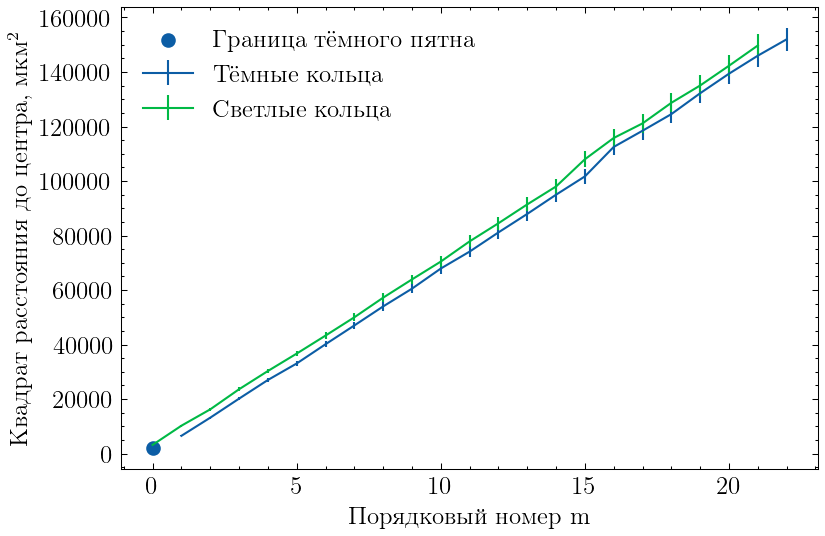

In [ ]:
center_pos = 482 # +- 1
dark_dot = (482 - 435) * k[0]

dist = np.genfromtxt('iii-data.csv', skip_header=True) - center_pos
dist_si = (-dist)[::-1] * k[0]
dark_distances = dist_si[1::2]
light_distances = dist_si[::2]
m = np.arange(0, len(dist) / 2)

# dist_si**2 = (dist * k)**2
err = lambda dist : np.sqrt((k[0]**2 * 2*dist*1)**2 + (dist**2 * 2*k[0]*k[1])**2)
plt.errorbar(m+1, dark_distances**2, yerr=err(dark_distances), label='Тёмные кольца')
plt.errorbar(m, light_distances**2, yerr=err(light_distances), label='Светлые кольца')
plt.scatter(0, dark_dot**2, marker='o', label='Граница тёмного пятна')

plt.ylabel('Квадрат расстояния до центра, $\\text{мкм}^2$')
plt.xlabel('Порядковый номер m')
plt.legend()

plt.savefig(r'images/dark-light.svg')
plt.show()

**Тёмный проходит через (0,0)**

### Рассчёт кривизны

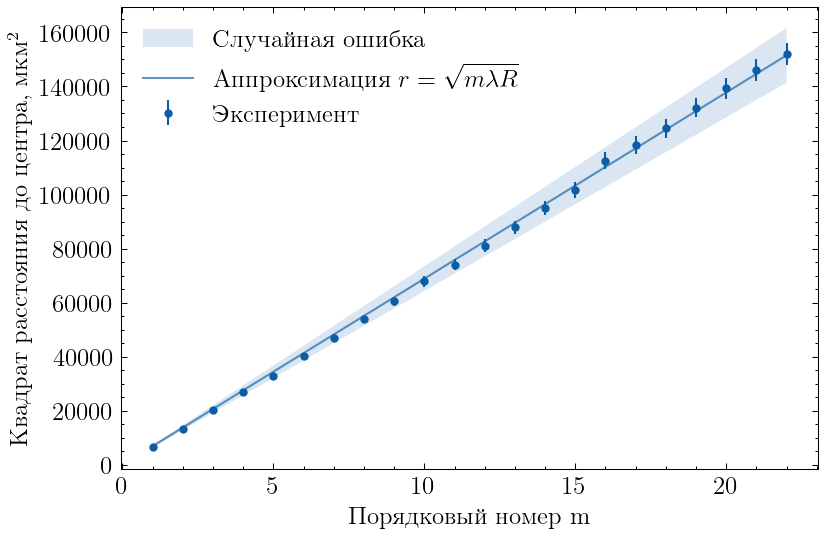

In [ ]:
def line1(x, k):
    return k*x

([lR1], [[lR1_err]]) = curve_fit(line1, m+1, dark_distances**2)

plt.fill_between(m+1, line1(m+1, lR1+lR1_err), line1(m+1, lR1-lR1_err), alpha=.15, edgecolor='none', label='Случайная ошибка')
plt.plot(m+1, line1(m+1, lR1), alpha=.65, label=r'Аппроксимация $r=\sqrt{m\lambda R}$', color='C0')
plt.errorbar(m+1, dark_distances**2, yerr=err(dark_distances), label='Эксперимент', marker='.', linestyle='none', color='C0')

plt.ylabel('Квадрат расстояния до центра, $\\text{мкм}^2$')
plt.xlabel('Порядковый номер m')
plt.legend()

plt.savefig(r'images/dark-approx.svg')
plt.show()

$R = k / \lambda\\
\delta R = \sqrt{\left(\dfrac{1}{\lambda}\right)^2 \delta k^2 + \left(\dfrac{k}{\lambda^2}\right)^2 \delta \lambda^2}$ 

In [ ]:
R = lR1 / lamb
R_err = np.sqrt((1/lamb)**2 * lR1_err**2 + (lR1/(lamb**2))**2 * lamb_err**2)
print(f'R = {R*1e-3:.3} +- {R_err*1e-3:.1} мм')

R = 12.7 +- 0.9 мм


### Разность длин волн, полученная при наблюдении биений

In [230]:
delta = 1/14 * lamb * 1e3 # нм
delta

38.714285714285715

### Лабораторный журнал